## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [15]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [18]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [21]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"
data_list = data.split(split_tag)
print(data_list[:10])

['n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg', 'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg', 'n00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg', 'n00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg', 'n00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg', 'n00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg', 'n00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg', 'n00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg', 'n00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg', 'n00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg']


In [25]:
arranged_data = []
for _ in data_list:
    try:
        arranged_data.append(_.split("\t")[1])
    except IndexError:
        pass
print(arranged_data[:10])

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg', 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg', 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg', 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg', 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg', 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg', 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg', 'http://www.porschemania.it/discus/messages/815/102099.jpg', 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg']


## 將 txt 轉成 pandas dataframe

In [26]:
import pandas as pd

    
df = pd.DataFrame(arranged_data)
# df.columns = ["url"]
df.head()

,0
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [29]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
# first_link = df.loc[0]["url0"]
first_link = df.loc[0][0]
print(first_link)

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


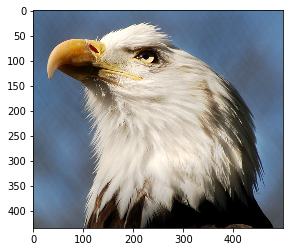

In [31]:
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))  # 注意response物件轉為numpy array的方法
# img = img.resize((img.size[0]*2, img.size[1]*2))
# Convert img to numpy array

plt.imshow(img)
plt.show()

In [32]:
url_list = list(df[0:5][0].values)
# url_list = list(df[0:5]["url"].values)
url_list

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']

In [42]:
def img2arr_fromURLs(url_list, resize=False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    import numpy as np
    import requests
    from PIL import Image
    
    img_list = []
    
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
        except Exception as err:
            print("{} in {}\nerr_msg: {}\n\n".format(type(err).__name__, url, str(err)))
            continue
        
        if resize:
            img = img.resize((img.size[0]*2, img.size[1]*2))
        img_arr = np.array(img)
        img_list.append(img_arr)
    
    return img_list

# from PIL import Image
# img2 = Image.open('data/example.jpg') # 這時候還是 PIL object
# img2 = np.array(img2)
# plt.imshow(img2)
# plt.show()
# im = np.array([np.array(Image.open('data/example.jpg')) for _ in range(N_times)])

OSError in http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
err_msg: cannot identify image file <_io.BytesIO object at 0x7f72a066f5f0>


Total images that we got: 4 


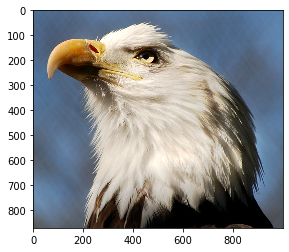

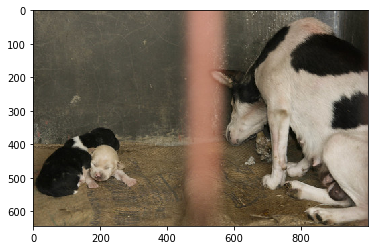

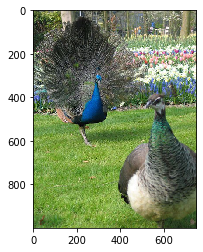

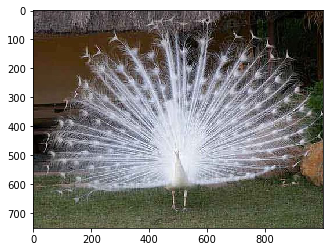

In [43]:
result = img2arr_fromURLs(url_list, True)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()